In [ ]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the csv file namd >> dirty_diabetes_data
df = pd.read_csv(r"dirty_diabetes_data.csv")

In [ ]:
# Show the data that inside the csv file
df
# as what we saw the data speak about the human
# about the gender and blood type and others like bmi, ...
# So, now we know about the data that we work on


,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,Male,A,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,Female,B,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,Male,A,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,Male,AB,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...,...,...
763,Male,NaN,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,Mile,NaN,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,Male,NaN,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,Male,NaN,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
# but, to dive deep in our dataset we will use the method info()
# it will give us more information about our dataset like what are types of the columns

df.info()

'''

As you can see below we have:
>> 10 columns (0 to 9)
>> 768 rows (0 to 767)

Aside that we will see data types of columns like --> object, flaot64, int64

So, the data types are ready, no need to convert any of the columns to another data type

Important thing we must to see it is if there is missing values or not
and in the below information we can make some comparison between the whole number of rows (768)
and each column below. Then you will notice that there is missing values in columns like (gender, blood_type, triceps)

'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  768 non-null    int64  
 3   glucose      766 non-null    float64
 4   diastolic    766 non-null    float64
 5   triceps      767 non-null    float64
 6   insulin      767 non-null    float64
 7   bmi          768 non-null    float64
 8   dpf          767 non-null    float64
 9   age          766 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 60.1+ KB


In [ ]:
# Let us know how many missing values we have in each columns
# to know if there is a missing value use isnull method then use the .sum() to calculate how many they

df.isnull().sum()

# You will notice that some columns have no missing values there and others content with missing values

gender          8
blood_type     21
pregnancies     0
glucose         2
diastolic       2
triceps         1
insulin         1
bmi             0
dpf             1
age             2
dtype: int64

In [ ]:
# After that we need to know if our dataset content duplicate values
# so use duplicated() method, then use sum() to calculate how many they
import colorama as colour  # pip install colorama
back = colour.Back.BLACK
fore = colour.Fore.LIGHTCYAN_EX

print(df.duplicated().head(10))

print()

print(back + fore + "  Sum duplicated values: ",df.duplicated().sum(), "  ")

# PLEASE CHECK IF THE colorama LIBRARY DOWNLOADED >> pip freeze

# No duplicated values there because the some equal 0, if there is True so will be duplicated

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

  Sum duplicated values:  0   


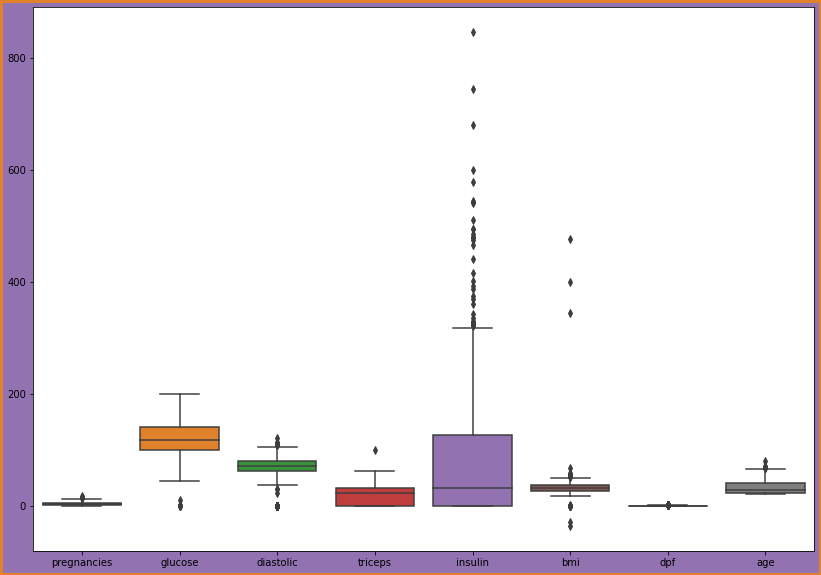

In [ ]:
# It is important to know if there are outliers in our dataset
# we can use chars to make this process more understandable and fancier
# use boxplot chart it is so good to show the outliers

# linewidth=0.0 default so we need change it to see the edg color linewidth=5
plt.figure(figsize=(14, 10), linewidth=5, edgecolor="#e1812c", facecolor='#9372b2')  # To change the size of the figure (width, height)
sea.boxplot(data=df)  # linewidth=5 here if we put it we will change the width of line of the boxplot



In [ ]:
# As you can see in the above chart there is outliers
# and we must handle them to make sure our dataset is cleaning

# we can build function to find the outliers

def outliers_interval(column):
  # [lowerBound, upperBound] >> IQR, Q3, Q1, 1.5
  # example qurtiles >> np.nanpercentile(df.pregnancies, [25, 75]) >>  [25, 75] >> Q1, Q3
  # The rule >> [a, b] >> a = Q1 - 1.5 * IQR, b = Q3 + 1.5 * IQR

  Q1, Q3 = np.nanpercentile(column, [25, 75])
  IQR = Q3 - Q1
  a = Q1 - 1.5 * IQR
  b = Q3 + 1.5 * IQR

  return a, b

# example >> print(outliers_interval(df.pregnancies))

# let us do that for all numeric columns

for column in df.columns:
  if df[column].dtypes != 'object':
    # print(outliers_interval(df.pregnancies))  # if any value in column more than b and less than a so this outliers
    a, b = outliers_interval(df[column])
    df[column] = np.where((df[column] > b) | (df[column] < a), np.nan, df[column])


In [ ]:
# The above cell we found the outliers then,
# we used np.where() to replace all outliers with nan values
# and then we can make this easier to work with it

In [ ]:
# let us to see information now

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  764 non-null    float64
 3   glucose      758 non-null    float64
 4   diastolic    721 non-null    float64
 5   triceps      766 non-null    float64
 6   insulin      733 non-null    float64
 7   bmi          743 non-null    float64
 8   dpf          738 non-null    float64
 9   age          757 non-null    float64
dtypes: float64(8), object(2)
memory usage: 60.1+ KB


In [ ]:

'''
here I will show how the missing values in columns raise
because we replace the outliers with nan values

old dataset
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  768 non-null    int64  
 3   glucose      766 non-null    float64
 4   diastolic    766 non-null    float64
 5   triceps      767 non-null    float64
 6   insulin      767 non-null    float64
 7   bmi          768 non-null    float64
 8   dpf          767 non-null    float64
 9   age          766 non-null    float64


new dataset
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  764 non-null    float64
 3   glucose      758 non-null    float64
 4   diastolic    721 non-null    float64
 5   triceps      766 non-null    float64
 6   insulin      733 non-null    float64
 7   bmi          743 non-null    float64
 8   dpf          738 non-null    float64
 9   age          757 non-null    float64

'''

In [ ]:
# after change the outliers to nan we can more specific now when we want clean our dataset

df.isna().sum()



gender          8
blood_type     21
pregnancies     4
glucose        10
diastolic      47
triceps         2
insulin        35
bmi            25
dpf            30
age            11
dtype: int64

In [ ]:
'''
old dataset 

gender          8
blood_type     21
pregnancies     0
glucose         2
diastolic       2
triceps         1
insulin         1
bmi             0
dpf             1
age             2
dtype: int64

----------------------

new dataset

gender          8
blood_type     21
pregnancies     4
glucose        10
diastolic      47
triceps         2
insulin        35
bmi            25
dpf            30
age            11
dtype: int64

'''

In [ ]:
# Now we want clean the dataset from missing values

# There is two way to solve our problem
# >> 1. removel >> remove the rows or the columns
# >> 2. replace the missing values with mean or the median

# removal not good if missing values in our dataset vary because this will make the dataset very small
# and the model that we will build it need much data


In [ ]:
# The first way >> Removal

# dropna() method work on dropping nan values

# copy our data
copy_df = df.copy()
# copy_df

copy_df.dropna(axis=1, inplace=True)


In [ ]:

'''
you see now how the removal way not good always because like the below no data
and as we descused above we have two ways the removal and the replacement

'''

copy_df 


""
0
1
2
3
4
...
763
764
765
766


In [ ]:
# Replace the missing values with mean or the median

# copy dataframe

new_copy_df = df.copy()

new_copy_df


,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,Male,A,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,Female,B,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,Male,A,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,Male,AB,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...
763,Male,NaN,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,Mile,NaN,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,Male,NaN,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,Male,NaN,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
# we will use replace() method to replace each nan value in each column

for each_column in new_copy_df.columns:
  if new_copy_df[each_column].dtypes != 'object':
    new_copy_df[each_column] = new_copy_df[each_column].replace(0.0 or np.nan, new_copy_df[each_column].mean())




In [ ]:
new_copy_df


,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,Male,A,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,Female,B,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,Male,A,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,Male,AB,0.0,137.0,40.0,35.0,168.0,43.1,0.429921,33.0
...,...,...,...,...,...,...,...,...,...,...
763,Male,NaN,10.0,101.0,76.0,48.0,180.0,32.9,0.171000,63.0
764,Mile,NaN,2.0,122.0,70.0,27.0,0.0,36.8,0.340000,27.0
765,Male,NaN,5.0,121.0,72.0,23.0,112.0,26.2,0.245000,30.0
766,Male,NaN,1.0,126.0,60.0,0.0,0.0,30.1,0.349000,47.0


In [ ]:
# Now we will take a look at the columns that from type object

# new_copy_df[new_copy_df['gender'] == 'Male']

new_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  768 non-null    float64
 3   glucose      768 non-null    float64
 4   diastolic    768 non-null    float64
 5   triceps      768 non-null    float64
 6   insulin      768 non-null    float64
 7   bmi          768 non-null    float64
 8   dpf          768 non-null    float64
 9   age          768 non-null    float64
dtypes: float64(8), object(2)
memory usage: 60.1+ KB


In [ ]:
new_copy_df[['gender', 'blood_type']]

# we can see here there are rows we don't need them [Mile and Nan]
# so we don't want to replace them and we will remove the row


,gender,blood_type
0,Male,A
1,Male,A
2,Female,B
3,Male,A
4,Male,AB
...,...,...
763,Male,NaN
764,Mile,NaN
765,Male,NaN
766,Male,NaN


In [ ]:
new_copy_df.dropna(axis=0, inplace=True)


In [ ]:
new_copy_df


,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,Male,A,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,Female,B,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,Male,A,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,Male,AB,0.0,137.0,40.0,35.0,168.0,43.1,0.429921,33.0
...,...,...,...,...,...,...,...,...,...,...
746,Male,B,1.0,147.0,94.0,41.0,0.0,49.3,0.358000,27.0
747,Male,O,1.0,81.0,74.0,41.0,57.0,46.3,1.096000,32.0
748,Male,O,3.0,187.0,70.0,22.0,200.0,36.4,0.408000,36.0
749,Female,A,6.0,162.0,62.0,0.0,0.0,24.3,0.178000,50.0


In [ ]:
new_copy_df['gender'].value_counts()

Male      503
Female    185
Make       23
female     22
Femali      2
Mile        2
mal         1
Femal       1
Name: gender, dtype: int64

In [ ]:


new_copy_df['gender'] = np.where(new_copy_df['gender'].str.contains('emal'), 'Female', new_copy_df['gender'])



In [ ]:
new_copy_df['gender'] = np.where(new_copy_df['gender'] == 'Make', "Male", new_copy_df['gender'])
new_copy_df['gender'] = np.where(new_copy_df['gender'] == 'mal', "Male", new_copy_df['gender'])
new_copy_df['gender'] = np.where((new_copy_df['gender'] == 'Mile'), "Male", new_copy_df['gender'])



In [ ]:
new_copy_df[['gender']].value_counts()

gender
Male      529
Female    210
dtype: int64

In [ ]:
# The last dataframe 
new_copy_df

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,Male,A,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,Female,B,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,Male,A,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,Male,AB,0.0,137.0,40.0,35.0,168.0,43.1,0.429921,33.0
...,...,...,...,...,...,...,...,...,...,...
746,Male,B,1.0,147.0,94.0,41.0,0.0,49.3,0.358000,27.0
747,Male,O,1.0,81.0,74.0,41.0,57.0,46.3,1.096000,32.0
748,Male,O,3.0,187.0,70.0,22.0,200.0,36.4,0.408000,36.0
749,Female,A,6.0,162.0,62.0,0.0,0.0,24.3,0.178000,50.0


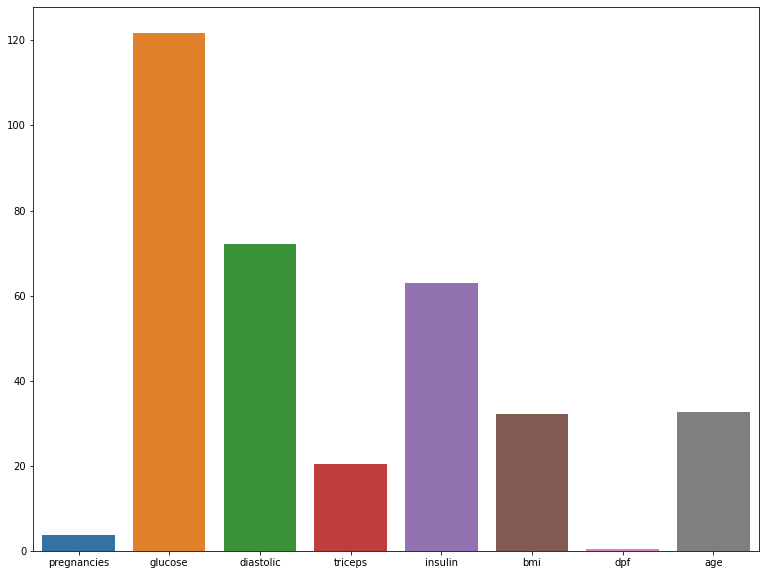

In [ ]:
# last chart

plt.figure(figsize=(13, 10))
sea.barplot(data=new_copy_df, ci=None)
